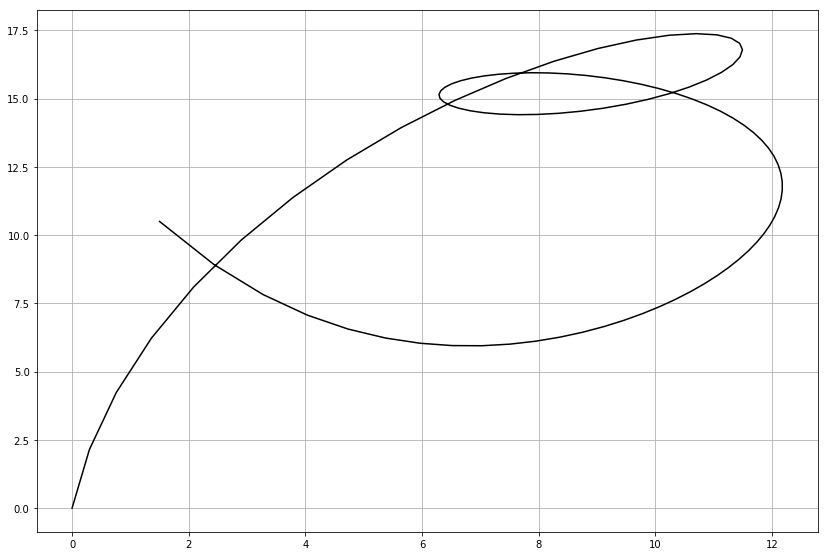

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt


xs = [0, 3.5, 25, 25, -5,-5, 15, -0.5, 19.5, 7, 1.5]
ys = [0, 36, 25, 1.5, 3, 33, 11, 35, 15.5, 0, 10.5]
weight = [1, 6, 4, 2, 3, 2, 2, 1, 5, 4, 1]


def newton(n, k):
    aux = lambda acc, i: acc if i >= k else aux(acc * (n - i + 1.0) / i, i+1)
    return aux(1.0, 1)


def bernstein(n, i, t):
    return newton(n, i) * ( (t ** i) * ((1-t) ** (n-i)) )


def calc_step(n, t, times):
    return lambda i: weight[i] * times[i] * bernstein(n, i, t)


def calc_point(n, z):
    t = z / 100.0
    iters = range(n+1)
    current_x = sum(map(calc_step(n, t, xs), iters))
    current_y = sum(map(calc_step(n, t, ys), iters))
    denominator = sum(map(calc_step(n, t, [1]*(n+1)), iters))
    return (current_x/denominator, current_y/denominator)


def points():
    n = len(xs) - 1
    return [calc_point(n, z) for z in range(101)]


def main():
    scale = 0.8
    plt.rcParams['figure.figsize'] = (scale * 17.5, scale * 12)

    xs, ys = zip(*points())
    plt.plot(xs, ys, 'k')
    plt.grid(True)
    plt.show()


if __name__ == '__main__':
    main()
